In [1]:
from google.colab import auth
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.patches
import seaborn as sns
import cv2 as cv
import pandas as pd
import geopandas as gpd
from shapely.geometry import Polygon
import subprocess
import itertools
from tqdm import tqdm
import os
import numba as nb
plt.style.use("seaborn-v0_8-white")

from google.colab import drive
drive.mount('/content/gdrive')

auth.authenticate_user()

Mounted at /content/gdrive


In [2]:
!git clone https://github.com/AnujTiwari/India-State-and-Country-Shapefile-Updated-Jan-2020.git

Cloning into 'India-State-and-Country-Shapefile-Updated-Jan-2020'...
remote: Enumerating objects: 28, done.
remote: Counting objects: 100% (28/28), done.
remote: Compressing objects: 100% (24/24), done.
remote: Total 28 (delta 5), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (28/28), 16.46 MiB | 8.85 MiB/s, done.
Resolving deltas: 100% (5/5), done.


In [3]:
tile_meta = gpd.read_file("/content/gdrive/MyDrive/field_delineation/india_DLTiles.gpkg")

In [4]:
states = gpd.read_file("/content/India-State-and-Country-Shapefile-Updated-Jan-2020/India_State_Boundary.shp")
states.to_crs("EPSG:4326", inplace=True)

In [5]:
states.head()

Output hidden; open in https://colab.research.google.com to view.

In [6]:
"""
gdf = gpd.GeoDataFrame()#crs=states.crs)
for crs in tile_meta.bounds_crs.unique():
    crs_df = tile_meta.loc[tile_meta.bounds_crs == crs]
    crs_df.set_crs(crs, allow_override=True, inplace=True)
    crs_df.to_crs("EPSG:4326", inplace=True)
    gdf = pd.concat([gdf, crs_df])
"""
gdf = tile_meta.copy()
gdf = gdf[["key", "geometry"]]

<Axes: >

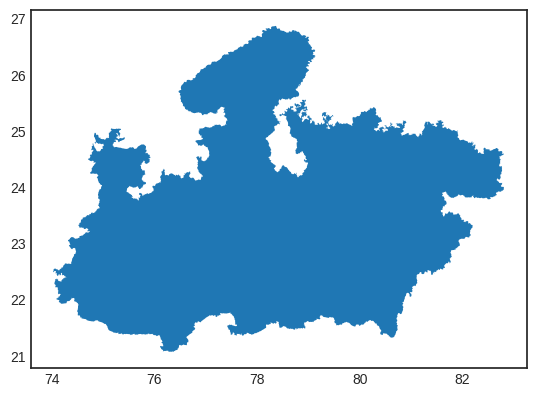

In [7]:
fig, ax = plt.subplots()
states.loc[states.State_Name == "Madhya Pradesh"].plot(ax=ax)

In [8]:
gdf_mp = gdf.loc[gdf.within(states.loc[states.State_Name == "Madhya Pradesh"].geometry.iat[0])]

In [83]:
gdf_mp.to_file("/content/gdrive/MyDrive/field_delineation/tiles_mp.gpkg", layer='tiles', driver="GPKG")

In [9]:
rectangle = Polygon([(78.5, 22.5), (79.1, 22.5), (79.1, 23.1), (78.5, 23.1)])

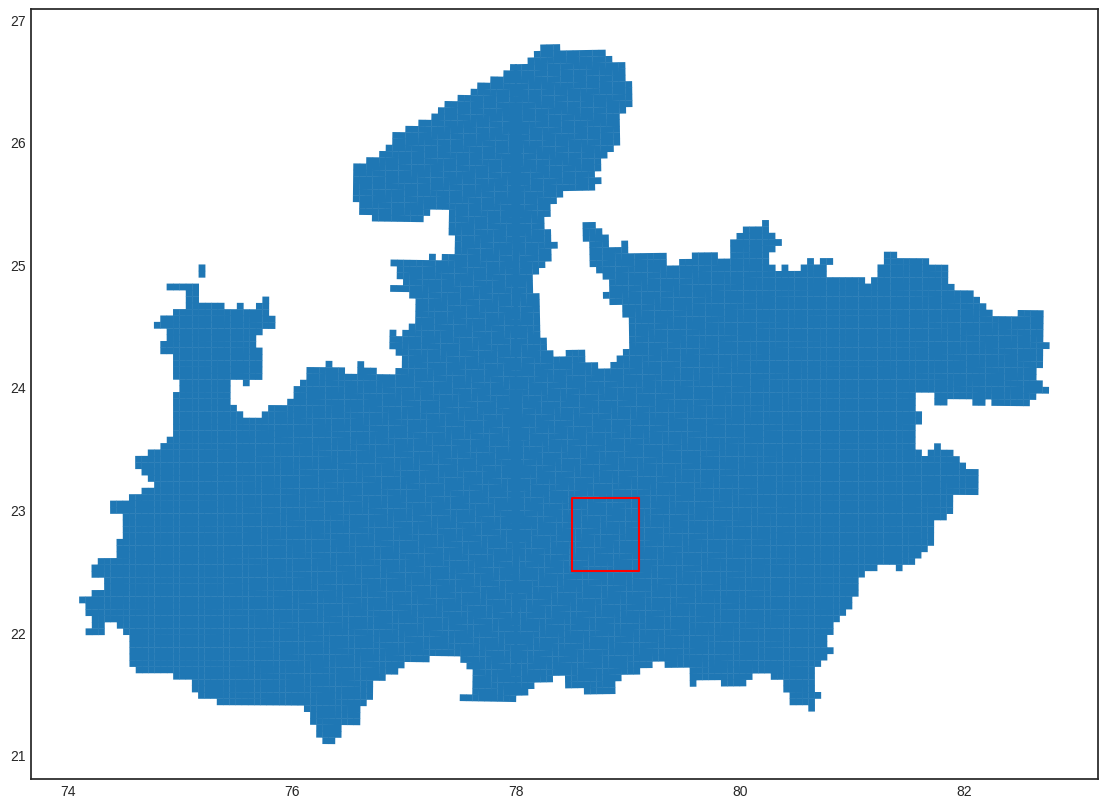

In [10]:
fig, ax = plt.subplots(1, figsize=(20, 10))
gdf_mp.plot(ax=ax)
ax.plot(*rectangle.exterior.xy, color="red")

In [11]:
df_roi = gdf_mp.loc[gdf_mp.within(rectangle)]

In [125]:
#df_roi[["key"]].to_csv("/content/gdrive/MyDrive/field_delineation/tiles_roi.csv")

In [13]:
df_roi.to_file("/content/gdrive/MyDrive/field_delineation/tiles_roi.gpkg", layer='tiles', driver="GPKG")

<Axes: >

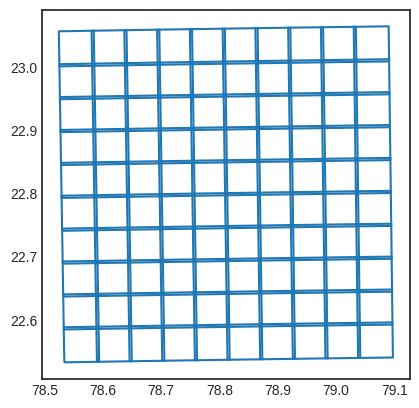

In [12]:
df_roi.boundary.plot()